# GRIP @ THE SPARKS FOUNDATION

# Prediction Using Unsupervised ML

##### TASK 2: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Author: PRANAVI SHAKKARI

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

##### LOADING THE IRIS DATASET

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


##### DETERMINING THE OPTIMUM NUMBER OF CLUSTERS

In [3]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

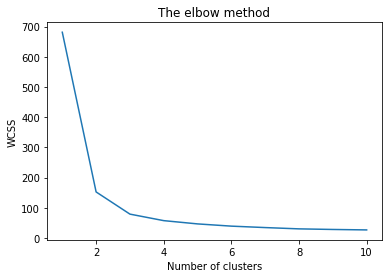

In [4]:
# Plotting the results onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

###### The graph shows that the elbow occcurs approximately at 3. Hence the optimum number of clusters is 3.

##### CREATING THE K-MEANS CLASSIFIER

In [5]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

##### VISUALISING THE CLUSTERS- BASED ON SEPAL LENGTH AND SEPAL WIDTH

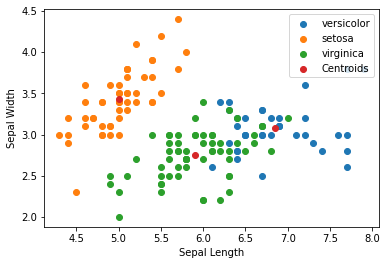

In [6]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], label = 'versicolor')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], label = 'setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], label = 'virginica')

# Plotting the centroids.

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], label = 'Centroids')
plt.legend(loc='upper right') 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

##### VISUALISING THE CLUSTERS- BASED ON PETAL LENGTH AND PETAL WIDTH

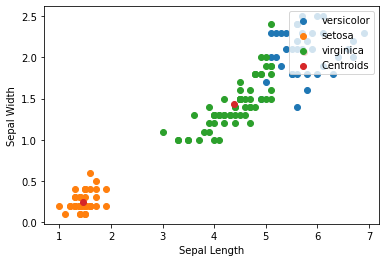

In [7]:
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], label = 'versicolor')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], label = 'setosa')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3], label = 'virginica')

# Plotting the centroids.

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], label = 'Centroids')
plt.legend(loc='upper right') 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()